<a href="https://colab.research.google.com/github/IndraLukasTjahaja/Python201_Modeling/blob/master/IYKRA_OnClass_CreditScoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Persiapan Google Colaboratory dan Downloading dataset

Ada banyak cara untuk impor data loan ke Google Colab, dua metode yang dapat kita lakukan: melalui Google Drive atau ke website Tjahaja.com.

Untuk contoh ini, kita akan menggunakan Google Drive

In [ ]:
# 1. Download dari Google Drive. Pastikan sudah mengkopi data ke Google Sheet kalian, 
#    dengan cara membuka link Google Sheet dan save ke Google Drive kalian

from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('OnClass_CreditScoring_data_v2').sheet1
# Ganti nama di atas dengan nama file

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(rows)

# Create a new variable called 'new_header' from the first row of 
# the dataset
# This calls the first row for the header
new_header = df.iloc[0] 
# take the rest of your data minus the header row
df = df[1:] 
# set the header row as the df header
df.columns = new_header 
# Lets see the 5 first rows of the new dataset
df.head()

[['ID', 'gagal_bayar', 'Status_Rekening_Bank', 'Lama_Cicilan', 'SLIK_Kredit', 'Tujuan_Pinjaman', 'Jumlah_Pinjaman', 'Pendapatan_perbulan', 'Lama_Bekerja', 'Status', 'Kepemilikan_Rumah', 'Usia', 'Lama_tinggal_ditempat_sekarang', 'Pekerjaan', 'Jumlah_Pinjaman_di_Bank_ini', 'rasio_cicilan_pendapatan'], ['ABC0001', '0_Bayar', '2_Tabungan_<=_100_ribu', '6', '2_Pinjaman_di_Bank_lain_Semua_Bagus', 'peralatan_rumahtangga', '1,169,000.00', '5. rahasia', '5_>7_tahun_kerja', '2_menikah', '1_milik_sendiri', '67', '4_>10_tahun', '1_pegawai', '1_sudah_ada_1_pinjaman', '4_lebih_30%'], ['ABC0002', '1_Gagal', '3_Tabungan_<=_2_juta', '48', '4_Pinjaman_di_Bank_lain_Ada_Telat', 'peralatan_rumahtangga', '5,951,000.00', '1. < 1 juta', '3_1-4_tahun_kerja', '1_belum_menikah', '1_milik_sendiri', '22', '2_1-5_tahun', '1_pegawai', '0_ini_pinjaman_pertama', '2_10_ke_20%'], ['ABC0003', '0_Bayar', '1_Tidak_ada_Rekening', '12', '2_Pinjaman_di_Bank_lain_Semua_Bagus', 'liburan', '2,096,000.00', '1. < 1 juta', '4_4-7_t

,ID,gagal_bayar,Status_Rekening_Bank,Lama_Cicilan,SLIK_Kredit,Tujuan_Pinjaman,Jumlah_Pinjaman,Pendapatan_perbulan,Lama_Bekerja,Status,Kepemilikan_Rumah,Usia,Lama_tinggal_ditempat_sekarang,Pekerjaan,Jumlah_Pinjaman_di_Bank_ini,rasio_cicilan_pendapatan
1,ABC0001,0_Bayar,2_Tabungan_<=_100_ribu,6,2_Pinjaman_di_Bank_lain_Semua_Bagus,peralatan_rumahtangga,"1,169,000.00",5. rahasia,5_>7_tahun_kerja,2_menikah,1_milik_sendiri,67,4_>10_tahun,1_pegawai,1_sudah_ada_1_pinjaman,4_lebih_30%
2,ABC0002,1_Gagal,3_Tabungan_<=_2_juta,48,4_Pinjaman_di_Bank_lain_Ada_Telat,peralatan_rumahtangga,"5,951,000.00",1. < 1 juta,3_1-4_tahun_kerja,1_belum_menikah,1_milik_sendiri,22,2_1-5_tahun,1_pegawai,0_ini_pinjaman_pertama,2_10_ke_20%
3,ABC0003,0_Bayar,1_Tidak_ada_Rekening,12,2_Pinjaman_di_Bank_lain_Semua_Bagus,liburan,"2,096,000.00",1. < 1 juta,4_4-7_tahun_kerja,2_menikah,1_milik_sendiri,49,3_5-10_tahun,2_wiraswasta,0_ini_pinjaman_pertama,2_10_ke_20%
4,ABC0004,0_Bayar,2_Tabungan_<=_100_ribu,42,4_Pinjaman_di_Bank_lain_Ada_Telat,elektronik,"7,882,000.00",1. < 1 juta,4_4-7_tahun_kerja,2_menikah,3_bersama_keluarga,45,4_>10_tahun,1_pegawai,0_ini_pinjaman_pertama,2_10_ke_20%
5,ABC0005,1_Gagal,2_Tabungan_<=_100_ribu,24,3_Pinjaman_di_Bank_lain_Pernah_Telat,mobil_baru,"4,870,000.00",1. < 1 juta,3_1-4_tahun_kerja,2_menikah,3_bersama_keluarga,53,4_>10_tahun,1_pegawai,1_sudah_ada_1_pinjaman,3_20_ke_30%


In [ ]:
# 2. Download dari website tjahaja.com

#library panda untuk menggunakan data frame
import pandas as pd

# Impor data dari excel xls ke Python
df = pd.read_excel('https://tjahaja.com/wp-content/uploads/2021/03/OnClass_CreditScoring_data_v2.xlsx')

In [ ]:
!pip install scorecardpy

     |████████████████████████████████| 61kB 3.2MB/s 
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.2-cp37-none-any.whl size=57826 sha256=e596fc1604498db71b1df2fc31c568ca794d03c8821a5baf48226a0fd5325c5f
  Stored in directory: /root/.cache/pip/wheels/1d/66/14/23aeb4e1128278f5880580e2fdd10e956de112a5d56a3a043e
Successfully built scorecardpy


# 1. Persiapan data untuk Analisa

In [ ]:
# Cek tipe data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              999 non-null    object 
 1   gagal_bayar                     991 non-null    object 
 2   Status_Rekening_Bank            989 non-null    object 
 3   Lama_Cicilan                    981 non-null    float64
 4   SLIK_Kredit                     987 non-null    object 
 5   Tujuan_Pinjaman                 995 non-null    object 
 6   Jumlah_Pinjaman                 1000 non-null   int64  
 7   Pendapatan_perbulan             989 non-null    object 
 8   Lama_Bekerja                    972 non-null    object 
 9   Status                          995 non-null    object 
 10  Kepemilikan_Rumah               996 non-null    object 
 11  Usia                            998 non-null    float64
 12  Lama_tinggal_ditempat_sekarang  997

In [ ]:
df.head()

,ID,gagal_bayar,Status_Rekening_Bank,Lama_Cicilan,SLIK_Kredit,Tujuan_Pinjaman,Jumlah_Pinjaman,Pendapatan_perbulan,Lama_Bekerja,Status,Kepemilikan_Rumah,Usia,Lama_tinggal_ditempat_sekarang,Pekerjaan,Jumlah_Pinjaman_di_Bank_ini,rasio_cicilan_pendapatan
0,ABC0001,0_Bayar,2_Tabungan_<=_100_ribu,6.0,2_Pinjaman_di_Bank_lain_Semua_Bagus,peralatan_rumahtangga,1169000,5. rahasia,5_>7_tahun_kerja,2_menikah,1_milik_sendiri,67.0,4_>10_tahun,1_pegawai,1_sudah_ada_1_pinjaman,4_lebih_30%
1,ABC0002,1_Gagal,3_Tabungan_<=_2_juta,48.0,4_Pinjaman_di_Bank_lain_Ada_Telat,peralatan_rumahtangga,5951000,1. < 1 juta,3_1-4_tahun_kerja,1_belum_menikah,1_milik_sendiri,22.0,2_1-5_tahun,1_pegawai,0_ini_pinjaman_pertama,2_10_ke_20%
2,ABC0003,0_Bayar,1_Tidak_ada_Rekening,12.0,2_Pinjaman_di_Bank_lain_Semua_Bagus,liburan,2096000,1. < 1 juta,4_4-7_tahun_kerja,2_menikah,1_milik_sendiri,49.0,3_5-10_tahun,2_wiraswasta,0_ini_pinjaman_pertama,2_10_ke_20%
3,ABC0004,0_Bayar,2_Tabungan_<=_100_ribu,42.0,4_Pinjaman_di_Bank_lain_Ada_Telat,elektronik,7882000,1. < 1 juta,4_4-7_tahun_kerja,2_menikah,3_bersama_keluarga,45.0,4_>10_tahun,1_pegawai,0_ini_pinjaman_pertama,2_10_ke_20%
4,ABC0005,1_Gagal,2_Tabungan_<=_100_ribu,24.0,3_Pinjaman_di_Bank_lain_Pernah_Telat,mobil_baru,4870000,1. < 1 juta,3_1-4_tahun_kerja,2_menikah,3_bersama_keluarga,53.0,4_>10_tahun,1_pegawai,1_sudah_ada_1_pinjaman,3_20_ke_30%


In [ ]:
# Mengkonversi  empty string menjadi null
import numpy as np
df = df.replace('', np.nan)

# Mengkonversi string menjadi integer 
df['Lama_Cicilan'] = pd.to_numeric(df['Lama_Cicilan'], errors='coerce').astype('Int64')
#df['Jumlah_Pinjaman'] = df['Jumlah_Pinjaman'].str.replace(',','')
df['Jumlah_Pinjaman'] = pd.to_numeric(df['Jumlah_Pinjaman'], errors='coerce').astype('Int64')
df['Usia'] = pd.to_numeric(df['Usia'], errors='coerce').astype('Int64')

In [ ]:
# Cek tipe data lagi
df.info()
# Fungsi apa yang kita gunakan?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID                              999 non-null    object
 1   gagal_bayar                     991 non-null    object
 2   Status_Rekening_Bank            989 non-null    object
 3   Lama_Cicilan                    981 non-null    Int64 
 4   SLIK_Kredit                     987 non-null    object
 5   Tujuan_Pinjaman                 995 non-null    object
 6   Jumlah_Pinjaman                 1000 non-null   Int64 
 7   Pendapatan_perbulan             989 non-null    object
 8   Lama_Bekerja                    972 non-null    object
 9   Status                          995 non-null    object
 10  Kepemilikan_Rumah               996 non-null    object
 11  Usia                            998 non-null    Int64 
 12  Lama_tinggal_ditempat_sekarang  997 non-null    o

# Question 1. What to do with the missing data?

## For this exercise, since the missing data not significant. We will just remove them

In [ ]:
# using dropna() function   
df2 = df.dropna()

# check df again
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID                              891 non-null    object
 1   gagal_bayar                     891 non-null    object
 2   Status_Rekening_Bank            891 non-null    object
 3   Lama_Cicilan                    891 non-null    Int64 
 4   SLIK_Kredit                     891 non-null    object
 5   Tujuan_Pinjaman                 891 non-null    object
 6   Jumlah_Pinjaman                 891 non-null    Int64 
 7   Pendapatan_perbulan             891 non-null    object
 8   Lama_Bekerja                    891 non-null    object
 9   Status                          891 non-null    object
 10  Kepemilikan_Rumah               891 non-null    object
 11  Usia                            891 non-null    Int64 
 12  Lama_tinggal_ditempat_sekarang  891 non-null    ob

# 2. Data Exploration

In [ ]:
# Untuk melihat frekuensi dari variabel default
print(df2['gagal_bayar'].value_counts())

0_Bayar    630
1_Gagal    261
Name: gagal_bayar, dtype: int64


In [ ]:
# Untuk melihat frekuensi dari variabel Status_Rekening_Bank
df2['Status_Rekening_Bank'].value_counts()
# Kesimpulan?

1_Tidak_ada_Rekening      357
3_Tabungan_<=_2_juta      239
2_Tabungan_<=_100_ribu    237
4_Tabungan_>_2_juta        58
Name: Status_Rekening_Bank, dtype: int64

In [ ]:
# Untuk melihat proporsi dari variabel default
print(df2['gagal_bayar'].value_counts(normalize=True) * 100)

0_Bayar    70.707071
1_Gagal    29.292929
Name: gagal_bayar, dtype: float64


In [ ]:
# Untuk melihat proporsi dari variabel Status_Rekening_Bank
df2['Status_Rekening_Bank'].value_counts(normalize=True)*100
# Kesimpulan?

1_Tidak_ada_Rekening      40.067340
3_Tabungan_<=_2_juta      26.823793
2_Tabungan_<=_100_ribu    26.599327
4_Tabungan_>_2_juta        6.509540
Name: Status_Rekening_Bank, dtype: float64

In [ ]:
# Melihat kaitan antara variabel credit_history dengan default (gagal bayar)
print(pd.crosstab(df2['Status_Rekening_Bank'], df2['gagal_bayar']))

gagal_bayar             0_Bayar  1_Gagal
Status_Rekening_Bank                    
1_Tidak_ada_Rekening        314       43
2_Tabungan_<=_100_ribu      122      115
3_Tabungan_<=_2_juta        149       90
4_Tabungan_>_2_juta          45       13


In [ ]:
# Melihat kaitan antara variabel SLIK_Kredit dengan default (gagal bayar)
pd.crosstab(df2['SLIK_Kredit'],df2['gagal_bayar'],normalize='columns',)*100
# Kesimpulan?

gagal_bayar,0_Bayar,1_Gagal
SLIK_Kredit,,
1_Tidak_Pernah_Pinjam,2.222222,8.429119
2_Pinjaman_di_Bank_lain_Semua_Bagus,35.238095,14.176245
3_Pinjaman_di_Bank_lain_Pernah_Telat,8.571429,9.578544
4_Pinjaman_di_Bank_lain_Ada_Telat,50.793651,58.620690
5_Sebelumnya_Pinjam_Pernah_Telat,3.174603,9.195402


In [ ]:
# Melihat proporsi kaitan antara variabel credit_history dengan default (gagal bayar)
print(pd.crosstab(df2['Status_Rekening_Bank'], df2['gagal_bayar'], normalize='index') * 100)

gagal_bayar               0_Bayar    1_Gagal
Status_Rekening_Bank                        
1_Tidak_ada_Rekening    87.955182  12.044818
2_Tabungan_<=_100_ribu  51.476793  48.523207
3_Tabungan_<=_2_juta    62.343096  37.656904
4_Tabungan_>_2_juta     77.586207  22.413793


In [ ]:
# Melihat proporsi kaitan antara variabel SLIK_Kredit dengan default (gagal bayar)
# Kesimpulan?


In [ ]:
from numpy import mean
from numpy import std
# Rangkuman statistik untuk variabel numerik Usia
print(df2['Usia'].describe())
print((mean(df2['Usia']), std(df2['Usia'])))

count    891.000000
mean      35.750842
std       11.390351
min       19.000000
25%       27.000000
50%       33.000000
75%       42.000000
max       75.000000
Name: Usia, dtype: float64
(35.75084175084175, 11.383957388511346)


In [ ]:
# Rangkuman statistik untuk variabel numerik Jumlah_Pinjaman
df2['Jumlah_Pinjaman'].describe()
# Kesimpulan?

count    8.910000e+02
mean     3.283774e+06
std      2.870034e+06
min      5.000000e+00
25%      1.353500e+06
50%      2.303000e+06
75%      3.998000e+06
max      1.842400e+07
Name: Jumlah_Pinjaman, dtype: float64

In [ ]:
# Rangkuman statistik untuk variabel numerik Usia, berdasarkan default (gagal bayar atau tidak)
df2.groupby('gagal_bayar')['Usia'].describe()

,count,mean,std,min,25%,50%,75%,max
gagal_bayar,,,,,,,,
0_Bayar,630.0,36.338095,11.295777,19.0,27.0,35.0,43.0,75.0
1_Gagal,261.0,34.333333,11.514205,19.0,25.0,31.0,41.0,74.0


In [ ]:
# Rangkuman statistik untuk variabel numerik Jumlah_Pinjaman, berdasarkan default (gagal bayar atau tidak)
# Kesimpulan?

# Question 2. Is the 5C applicable for this case?

---



# 3. Statistic Exploration

In [ ]:
# Mengubah target variabel gagal_bayar menjadi angka 0 dan 1
conditions = [
             df2['gagal_bayar'] == '1_Gagal', 
             df2['gagal_bayar'] == '0_Bayar'
             ]

choices     = [
             1,
             0
             ]
df2['default'] = np.select(conditions,choices, default = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
# double check apakah berjalan dengan benar
df2.info()
df2.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID                              891 non-null    object
 1   gagal_bayar                     891 non-null    object
 2   Status_Rekening_Bank            891 non-null    object
 3   Lama_Cicilan                    891 non-null    Int64 
 4   SLIK_Kredit                     891 non-null    object
 5   Tujuan_Pinjaman                 891 non-null    object
 6   Jumlah_Pinjaman                 891 non-null    Int64 
 7   Pendapatan_perbulan             891 non-null    object
 8   Lama_Bekerja                    891 non-null    object
 9   Status                          891 non-null    object
 10  Kepemilikan_Rumah               891 non-null    object
 11  Usia                            891 non-null    Int64 
 12  Lama_tinggal_ditempat_sekarang  891 non-null    ob

,ID,gagal_bayar,Status_Rekening_Bank,Lama_Cicilan,SLIK_Kredit,Tujuan_Pinjaman,Jumlah_Pinjaman,Pendapatan_perbulan,Lama_Bekerja,Status,Kepemilikan_Rumah,Usia,Lama_tinggal_ditempat_sekarang,Pekerjaan,Jumlah_Pinjaman_di_Bank_ini,rasio_cicilan_pendapatan,default
0,ABC0001,0_Bayar,2_Tabungan_<=_100_ribu,6,2_Pinjaman_di_Bank_lain_Semua_Bagus,peralatan_rumahtangga,1169000,5. rahasia,5_>7_tahun_kerja,2_menikah,1_milik_sendiri,67,4_>10_tahun,1_pegawai,1_sudah_ada_1_pinjaman,4_lebih_30%,0
1,ABC0002,1_Gagal,3_Tabungan_<=_2_juta,48,4_Pinjaman_di_Bank_lain_Ada_Telat,peralatan_rumahtangga,5951000,1. < 1 juta,3_1-4_tahun_kerja,1_belum_menikah,1_milik_sendiri,22,2_1-5_tahun,1_pegawai,0_ini_pinjaman_pertama,2_10_ke_20%,1
2,ABC0003,0_Bayar,1_Tidak_ada_Rekening,12,2_Pinjaman_di_Bank_lain_Semua_Bagus,liburan,2096000,1. < 1 juta,4_4-7_tahun_kerja,2_menikah,1_milik_sendiri,49,3_5-10_tahun,2_wiraswasta,0_ini_pinjaman_pertama,2_10_ke_20%,0
3,ABC0004,0_Bayar,2_Tabungan_<=_100_ribu,42,4_Pinjaman_di_Bank_lain_Ada_Telat,elektronik,7882000,1. < 1 juta,4_4-7_tahun_kerja,2_menikah,3_bersama_keluarga,45,4_>10_tahun,1_pegawai,0_ini_pinjaman_pertama,2_10_ke_20%,0
4,ABC0005,1_Gagal,2_Tabungan_<=_100_ribu,24,3_Pinjaman_di_Bank_lain_Pernah_Telat,mobil_baru,4870000,1. < 1 juta,3_1-4_tahun_kerja,2_menikah,3_bersama_keluarga,53,4_>10_tahun,1_pegawai,1_sudah_ada_1_pinjaman,3_20_ke_30%,1


Pearson Correlation:  (0.6260175057943035, 4.051143212667403e-98)
Spearman Correlation:  SpearmanrResult(correlation=0.6255001848667647, pvalue=6.506627147756654e-98)


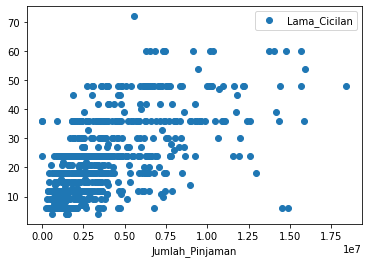

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
df2.plot(x='Jumlah_Pinjaman', y='Lama_Cicilan', style='o')
# Menghitung korelasi antara variabel Jumlah_Pinjaman dengan Lama_Cicilan
print('Pearson Correlation: ', pearsonr(df2['Jumlah_Pinjaman'], df2['Lama_Cicilan']))
print('Spearman Correlation: ', spearmanr(df2['Jumlah_Pinjaman'], df2['Lama_Cicilan']))

Pearson Correlation:  (0.21697165035076482, 5.927344753448398e-11)
Spearman Correlation:  SpearmanrResult(correlation=0.20240085416511855, pvalue=1.085433467889273e-09)


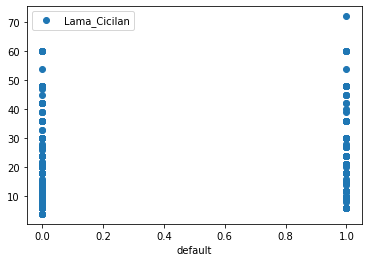

In [ ]:
df2.plot(x='default', y='Lama_Cicilan', style='o')
# Menghitung korelasi antara variabel Lama_Cicilan dengan default
print('Pearson Correlation: ', pearsonr(df2['default'], df2['Lama_Cicilan']))
print('Spearman Correlation: ', spearmanr(df2['default'], df2['Lama_Cicilan']))

Pearson Correlation:  (0.16140629270771598, 1.2793088747614106e-06)
Spearman Correlation:  SpearmanrResult(correlation=0.09765260804606708, pvalue=0.003525356332093157)


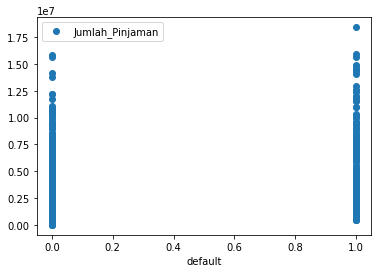

In [ ]:
# Menghitung korelasi antara variabel Jumlah_Pinjaman dengan default
df2.plot(x='default', y='Jumlah_Pinjaman', style='o')
# Menghitung korelasi antara variabel Lama_Cicilan dengan default
print('Pearson Correlation: ', pearsonr(df2['default'], df2['Jumlah_Pinjaman']))
print('Spearman Correlation: ', spearmanr(df2['default'], df2['Jumlah_Pinjaman']))

In [ ]:
# Uji coba hipotesis apakah ada perbedaan nilai rata-rata variabel Lama_Cicilan dengan default (gagal bayar dan tidak gagal bayar)
from scipy import stats
stats.ttest_ind( df2[df2.default == 0].Lama_Cicilan,
                 df2[df2.default == 1].Lama_Cicilan, nan_policy='omit')

Ttest_indResult(statistic=-6.627120985018002, pvalue=5.927344753453842e-11)

In [ ]:
# Uji coba hipotesis apakah ada perbedaan nilai rata-rata variabel Jumlah_Pinjaman dengan default (gagal bayar dan tidak gagal bayar)


# 4. Visualisation

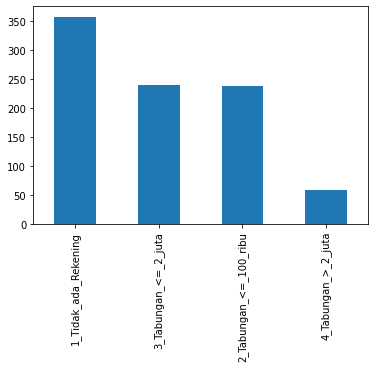

In [ ]:
# Fungsi value_counts().plot(kind='bar')
df2['Status_Rekening_Bank'].value_counts().plot(kind='bar') 

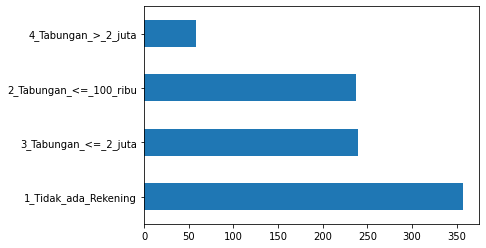

In [ ]:
# Karena nama dari isi variabel Status_Rekening_Bank panjang, mari kita tampilkan bar secara horizontal
df2['Status_Rekening_Bank'].value_counts().plot(kind='barh') 

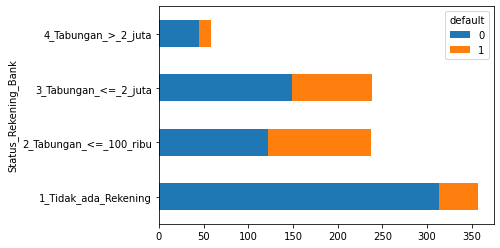

In [ ]:
# Nilai variabel Status_Rekening_Bank dan proporsi default secara plot bar
pd.crosstab(df2['Status_Rekening_Bank'], df2['default']).plot(kind='barh', stacked=True)

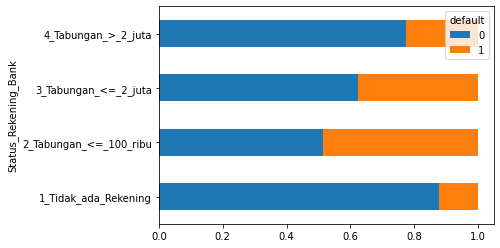

In [ ]:
# Nilai variabel Status_Rekening_Bank dan proporsi default secara plot bar, secara proporsi
pd.crosstab(df2['Status_Rekening_Bank'], df2['default'], normalize='index').plot(kind='barh', stacked=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot')

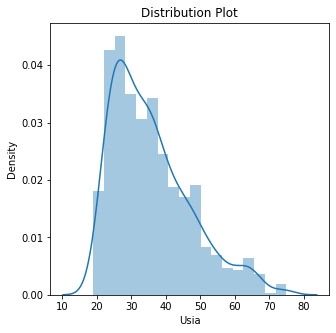

In [ ]:
# Untuk variabel numerik
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(5,5))
sns.distplot(df2['Usia'].dropna(), ax=ax).set_title('Distribution Plot') 

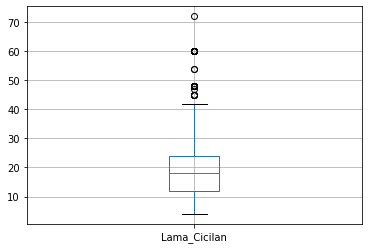

In [ ]:
df2.boxplot(column=['Lama_Cicilan'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


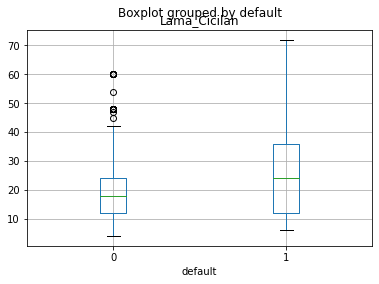

In [ ]:
# Menambahkan by di fungsi boxplot
df2.boxplot(by='default',column=['Lama_Cicilan'])

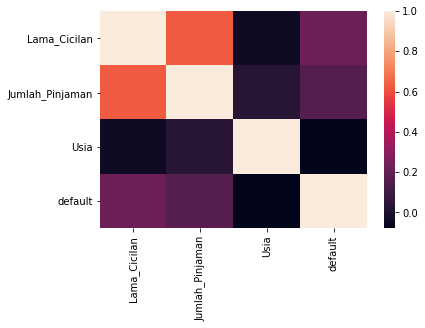

In [ ]:
# Korelasi Antar Variabel
import seaborn as sns
corr = df2.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [ ]:
# Koding berikut menggantikan missing value dari semua variabel dengan
# nilai yang paling sering muncul (modus)
#for column in df_prepare.columns:
#        df_prepare[column].fillna(df_prepare[column].mode()[0], inplace=True)

# 5. Feature Engineering

In [ ]:
df2['cicilan_per_bulan'] = df2['Jumlah_Pinjaman'] / df2['Lama_Cicilan']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


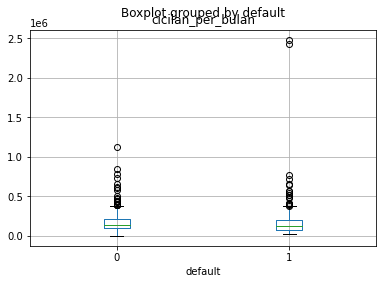

In [ ]:
# Fungsi boxplot dari variabel cicilan_per_bulan, dengan kemungkinan gagal bayar
df2.boxplot(by='default',column=['cicilan_per_bulan'])

In [ ]:
# Menghitung korelasi dan uji coba hipotesis antara variabel cicilan_per_bulan dengan default
print(df2['default'].corr(df2['cicilan_per_bulan']))
stats.ttest_ind( df2[df2.default == 0].cicilan_per_bulan,
                 df2[df2.default == 1].cicilan_per_bulan, nan_policy='omit')

0.02767145539241777


Ttest_indResult(statistic=-0.8253710227257757, pvalue=0.40938240382034596)

# 6 Persiapan Modeling

In [ ]:
## Transformasi variabel kategori menjadi numerik (One-Hot Encoding) 
# Koding untuk one hot encoding untuk semua variabel kategori

# Langkah pertama adalah membuang variabel ID karena ini adalah identifikasi nasabah
df2.drop(['ID'], axis = 1, inplace = True)
# Drop gagal_bayar juga karena sama dengan default
df2.drop(['gagal_bayar'], axis = 1, inplace = True)

# Memisahkan variabel kategori dengan variabel numerik
dataset_dummies = df2.select_dtypes(exclude = ['float64','int64','int'])
dataset_int = df2.select_dtypes(include=['float64','int64','int'])

# Memisahkan target/dependent variabel dari dataset dengan variabel kategori
target = df2['default']
dataset_int.drop(['default'], axis = 1, inplace = True)

# Menggunakan function get_dummies dari panda untuk melakukan one hot encoding
dataset_dummies_df = pd.get_dummies(dataset_dummies,drop_first = True)
    
# Menggabungkan dataset variabel kategori dari one hot encoding dengan variabel numerik
dataset = pd.concat([dataset_dummies_df, dataset_int], axis = 1)
feature_name = dataset.columns
df_encoded = pd.concat([dataset, target], axis = 1)

# drop default from dataset df_encoded
df_encoded.drop(['default'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_encoded.info()
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   Status_Rekening_Bank_2_Tabungan_<=_100_ribu         891 non-null    uint8
 1   Status_Rekening_Bank_3_Tabungan_<=_2_juta           891 non-null    uint8
 2   Status_Rekening_Bank_4_Tabungan_>_2_juta            891 non-null    uint8
 3   SLIK_Kredit_2_Pinjaman_di_Bank_lain_Semua_Bagus     891 non-null    uint8
 4   SLIK_Kredit_3_Pinjaman_di_Bank_lain_Pernah_Telat    891 non-null    uint8
 5   SLIK_Kredit_4_Pinjaman_di_Bank_lain_Ada_Telat       891 non-null    uint8
 6   SLIK_Kredit_5_Sebelumnya_Pinjam_Pernah_Telat        891 non-null    uint8
 7   Tujuan_Pinjaman_buka_bisnis                         891 non-null    uint8
 8   Tujuan_Pinjaman_elektronik                          891 non-null    uint8
 9   Tujuan_Pinjaman_libur

,Status_Rekening_Bank_2_Tabungan_<=_100_ribu,Status_Rekening_Bank_3_Tabungan_<=_2_juta,Status_Rekening_Bank_4_Tabungan_>_2_juta,SLIK_Kredit_2_Pinjaman_di_Bank_lain_Semua_Bagus,SLIK_Kredit_3_Pinjaman_di_Bank_lain_Pernah_Telat,SLIK_Kredit_4_Pinjaman_di_Bank_lain_Ada_Telat,SLIK_Kredit_5_Sebelumnya_Pinjam_Pernah_Telat,Tujuan_Pinjaman_buka_bisnis,Tujuan_Pinjaman_elektronik,Tujuan_Pinjaman_liburan,Tujuan_Pinjaman_makanan,Tujuan_Pinjaman_mobil_baru,Tujuan_Pinjaman_mobil_bekas,Tujuan_Pinjaman_pendidikan,Tujuan_Pinjaman_peralatan_rumahtangga,Tujuan_Pinjaman_reparasi,Pendapatan_perbulan_2. 1 - 5 juta,Pendapatan_perbulan_3. 5 - 10 juta,Pendapatan_perbulan_4. > 10 juta,Pendapatan_perbulan_5. rahasia,Lama_Bekerja_2_<1_tahun_kerja,Lama_Bekerja_3_1-4_tahun_kerja,Lama_Bekerja_4_4-7_tahun_kerja,Lama_Bekerja_5_>7_tahun_kerja,Status_2_menikah,Status_3_bercerai,Kepemilikan_Rumah_2_sewa,Kepemilikan_Rumah_3_bersama_keluarga,Lama_tinggal_ditempat_sekarang_2_1-5_tahun,Lama_tinggal_ditempat_sekarang_3_5-10_tahun,Lama_tinggal_ditempat_sekarang_4_>10_tahun,Pekerjaan_2_wiraswasta,Pekerjaan_3_pensiun,Pekerjaan_4_pengangguran,Jumlah_Pinjaman_di_Bank_ini_1_sudah_ada_1_pinjaman,Jumlah_Pinjaman_di_Bank_ini_2_sudah_ada_2_pinjaman,Jumlah_Pinjaman_di_Bank_ini_3_sudah_ada_3_pinjaman,rasio_cicilan_pendapatan_2_10_ke_20%,rasio_cicilan_pendapatan_3_20_ke_30%,rasio_cicilan_pendapatan_4_lebih_30%,Lama_Cicilan,Jumlah_Pinjaman,Usia
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,6,1169000,67
1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,48,5951000,22
2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,12,2096000,49
3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,42,7882000,45
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,24,4870000,53


# 7. Basic Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Basic Logistic Regression untuk 1 numeric variable saja
# Pilih salah satu numeric variable
X = df_encoded[['Lama_Cicilan']]
y = target

# Pembuatan model basic logistic regression 
log_reg = LogisticRegression() 
log_reg.fit(X, y) 

# Hasil dari model: parameter koefisien 
parameters = log_reg.coef_ 
print(parameters) 

# Predict based on the model
y_pred=log_reg.predict(X)

[[0.03723213]]


In [ ]:
# Lakukan Logistic Regression untuk Usia dan Jumlah_Pinjaman

# 8. Multivariate Logistic Regression

In [ ]:
# Basic Logistic Regression untuk 1 numeric variable saja
# Pilih salah satu numeric variable
X = df_encoded
y = target

# Pembuatan model multivariate logistic regression 
log_reg = LogisticRegression() 
log_reg.fit(X, y) 

# Hasil dari model: parameter koefisien 
parameters = log_reg.coef_ 
print(parameters) 

# Predict based on the model
y_pred=log_reg.predict(X)

[[ 4.14108668e-13 -1.60891127e-13 -3.29296459e-13 -1.86435930e-12
  -1.49194695e-13 -1.22252578e-12  1.46168048e-13 -7.72827594e-14
  -4.46739579e-13  6.62442464e-14 -2.87697757e-14 -3.71632323e-13
  -5.10580821e-13 -8.32193567e-14 -1.40565575e-12 -2.68584483e-14
  -1.86227562e-13 -3.81287435e-13 -3.37643735e-13 -1.07341345e-12
  -1.32618156e-13 -8.40481177e-13 -7.33062975e-13 -1.03180100e-12
  -1.82316446e-12 -4.47837149e-13 -1.50622920e-13  4.80571752e-14
  -7.70667619e-13 -4.77267961e-13 -1.20227176e-12 -6.46336979e-13
  -7.81761028e-14 -1.15913795e-13 -1.20669516e-12 -1.62469170e-13
  -1.40235965e-14 -7.62477682e-13 -5.19936417e-13 -1.15800751e-12
  -1.99287410e-11 -1.06545816e-07 -1.11252532e-10]]


In [ ]:
# For those that want to know the statistic modeling
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y, X.astype(float))
result = model.fit(method='newton')

result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.458453
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  891
Model:                          Logit   Df Residuals:                      847
Method:                           MLE   Df Model:                           43
Date:                Wed, 21 Apr 2021   Pseudo R-squ.:                  0.2419
Time:                        10:31:59   Log-Likelihood:                -408.48
converged:                       True   LL-Null:                       -538.84
Covariance Type:            nonrobust   LLR p-value:                 5.984e-33
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Status_Rekening_Bank_2_Tabungan_<=_100_ribu            1.4689      0.235      6.258      0.000       1.009       1.929
Status_Rekening_Bank_3_Tabungan_<=_2_juta              1.0315      0.236      4.375      0.000       0.569       1.494
Status_Rekening_Bank_4_Tabungan_>_2_juta               0.5903      0.397      1.488      0.137      -0.187       1.368
SLIK_Kredit_2_Pinjaman_di_Bank_lain_Semua_Bagus       -2.2011      0.447     -4.921      0.000      -3.078      -1.324
SLIK_Kredit_3_Pinjaman_di_Bank_lain_Pernah_Telat      -1.3505      0.475     -2.841      0.004      -2.282      -0.419
SLIK_Kredit_4_Pinjaman_di_Bank_lain_Ada_Telat         -1.1127      0.422     -2.639      0.008      -1.939      -0.286
SLIK_Kredit_5_Sebelumnya_Pinjam_Pernah_Telat          -0.2608      0.536     -0.486      0.627      -1.312       0.791
Tujuan_Pinjaman_buka_bisnis                           -1.0181      0.646     -1.576      0.115      -2.284       0.248
Tujuan_Pinjaman_elektronik                            -1.1273      0.624     -1.807      0.071      -2.350       0.096
Tujuan_Pinjaman_liburan                                0.1008      0.701      0.144      0.886      -1.273       1.475
Tujuan_Pinjaman_makanan                               -0.5260      0.812     -0.647      0.517      -2.118       1.066
Tujuan_Pinjaman_mobil_baru                            -0.5816      0.624     -0.932      0.352      -1.805       0.642
Tujuan_Pinjaman_mobil_bekas                           -1.9488      0.674     -2.892      0.004      -3.269      -0.628
Tujuan_Pinjaman_pendidikan                            -2.4798      1.270     -1.953      0.051      -4.968       0.008
Tujuan_Pinjaman_peralatan_rumahtangga                 -1.3418      0.628     -2.137      0.033      -2.572      -0.111
Tujuan_Pinjaman_reparasi                              -0.5699      0.958     -0.595      0.552      -2.447       1.307
Pendapatan_perbulan_2. 1 - 5 juta                     -0.2760      0.289     -0.954      0.340      -0.843       0.291
Pendapatan_perbulan_3. 5 - 10 juta                    -0.4499      0.441     -1.021      0.307      -1.314       0.414
Pendapatan_perbulan_4. > 10 juta                      -1.0660      0.518     -2.058      0.040      -2.081      -0.051
Pendapatan_perbulan_5. rahasia                        -1.1486      0.282     -4.075      0.000      -1.701      -0.596
Lama_Bekerja_2_<1_tahun_kerja                         -0.2762      0.446     -0.620      0.535      -1.149       0.597
Lama_Bekerja_3_1-4_tahun_kerja                        -0.5334      0.434     -1.230      0.219      -1.383       0.317
Lama_Bekerja_4_4-7_tahun_kerja                        -0.9902      0.480     -2.063      0.039      -1.931      -0.050
Lama_Bekerja_5_>7_tahun_kerja                         -0.4152      0.444     -0.935      0.350      -1.285       0.455
Status_2_menikah            

# 9 Training dan test data set

In [ ]:
# Menggunakan library dan fungsi train_test_split
from sklearn.model_selection import train_test_split

# Membagi data set menjadi train dan test, dimana proporsi test adalah 0.3 / 30% dari total data set
X_train, X_test, y_train, y_test = train_test_split(df_encoded, target, test_size =0.3, random_state=42)

# Karena X_train dalam bentuk array, tidak akan tersimpan nama variabel independen. Oleh karena itu kita akan simpan dalam bentuk list nama-nama kolom
# Akan banyak nama kolomnya
kolom_names = list(df_encoded.columns.values)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 512 to 119
Data columns (total 44 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Status_Rekening_Bank_2_Tabungan_<=_100_ribu         623 non-null    uint8  
 1   Status_Rekening_Bank_3_Tabungan_<=_2_juta           623 non-null    uint8  
 2   Status_Rekening_Bank_4_Tabungan_>_2_juta            623 non-null    uint8  
 3   SLIK_Kredit_2_Pinjaman_di_Bank_lain_Semua_Bagus     623 non-null    uint8  
 4   SLIK_Kredit_3_Pinjaman_di_Bank_lain_Pernah_Telat    623 non-null    uint8  
 5   SLIK_Kredit_4_Pinjaman_di_Bank_lain_Ada_Telat       623 non-null    uint8  
 6   SLIK_Kredit_5_Sebelumnya_Pinjam_Pernah_Telat        623 non-null    uint8  
 7   Tujuan_Pinjaman_buka_bisnis                         623 non-null    uint8  
 8   Tujuan_Pinjaman_elektronik                          623 non-null    uint8  
 9

# 10 Evaluasi model

In [ ]:
# Pembuatan model multivariate logistic regression 
log_reg = LogisticRegression() 
log_reg.fit(X_train, y_train) 

# Hasil dari model: parameter koefisien 
parameters = log_reg.coef_ 
print(parameters) 

# Predict based on the model
y_pred=log_reg.predict(X_test)

[[ 1.45820840e-04 -6.05988959e-05 -8.21313703e-05 -4.99706742e-04
  -3.29240115e-05 -3.46807367e-04  5.57454767e-05 -3.43434275e-05
  -1.41178598e-04  3.83556580e-05 -1.95801208e-05 -5.19664523e-05
  -1.23755113e-04 -2.39135334e-05 -4.25340744e-04  3.89634052e-06
  -6.15156842e-05 -1.31988870e-04 -1.19203210e-04 -2.91622818e-04
  -3.46258008e-05 -1.65353118e-04 -1.78741850e-04 -3.48900821e-04
  -5.10742220e-04 -1.26859609e-04 -1.52096138e-05  1.85042601e-05
  -2.11368457e-04 -1.59466941e-04 -3.21375985e-04 -1.54674974e-04
  -3.33192872e-05 -2.66006319e-05 -3.62909774e-04 -4.40571129e-05
  -7.08841845e-07 -1.75116760e-04 -1.45940864e-04 -3.47823323e-04
  -4.93448578e-03  1.12802443e-07 -3.10686334e-02]]


In [ ]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


[[192   2]
 [ 69   5]]


NameError: ignored

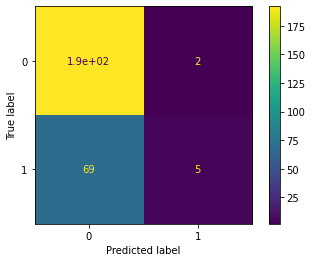

In [ ]:
## Evaluasi dengan Confusion Matrix 

# Menggunakan fungsi Confusion Matrix dari sklearn
from sklearn.metrics import confusion_matrix

# Kita akan cek hasil confusion matrix antara hasil sebenarnya dengan prediksi dari model ke data test
matrix = confusion_matrix(y_test, y_pred)

# cek hasil matrix
print(matrix)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg, X_test, y_test)  
plt.show()  

In [ ]:
## Evaluasi dengan Classification Report

# Menggunakan fungsi Classification Report dari sklearn
from sklearn.metrics import classification_report

# Kita akan cek hasil confusion matrix antara hasil sebenarnya dengan prediksi dari model ke data test
report = classification_report(y_test, y_pred)

# cek hasil matrix
print(report)

              precision    recall  f1-score   support

           0       0.75      0.96      0.85       194
           1       0.65      0.18      0.28        74

    accuracy                           0.75       268
   macro avg       0.70      0.57      0.56       268
weighted avg       0.73      0.75      0.69       268



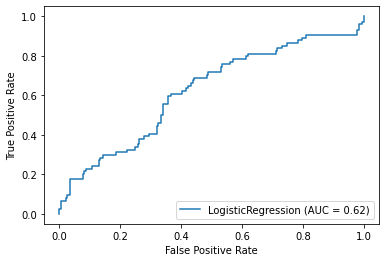

In [ ]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm

metrics.plot_roc_curve(log_reg, X_test, y_test)  
plt.show()      

# 11. Improving the logistic regression modeling

[[ 0.70031254  0.57578688  0.20131304 -0.84757525 -0.31629432 -0.41010246
   0.09881595 -0.027649   -0.04413116  0.26942488 -0.0550659   0.34523062
  -0.19866609 -0.14481336 -0.19427382  0.08611922 -0.18061299 -0.12808635
  -0.66069574 -0.43504355 -0.11703871 -0.1880455  -0.35912804 -0.30652286
  -0.30589989 -0.09246715  0.27742268  0.07256748  0.20273227 -0.0379384
   0.03429577  0.09642492 -0.23882884 -0.04381047  0.18517756 -0.02933101
   0.08231898  0.10643781  0.15032739  0.39627607  0.39483243  0.31574937
  -0.13422301 -0.11353716]]
[[165  29]
 [ 37  37]]


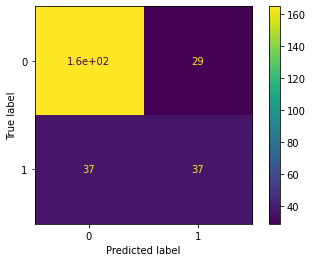

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       194
           1       0.56      0.50      0.53        74

    accuracy                           0.75       268
   macro avg       0.69      0.68      0.68       268
weighted avg       0.75      0.75      0.75       268



In [ ]:
# Menggunakan scaling dengan standard scaler dari library sklearn
from sklearn.preprocessing import StandardScaler

# Memanggil fungsi standard scaler
sc = StandardScaler()

# Merubah nilai X dari Train dan Test menjadi standardisation
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)

# Pembuatan model multivariate logistic regression 
log_reg = LogisticRegression() 
log_reg.fit(X_train_scale, y_train) 

# Hasil dari model: parameter koefisien 
parameters = log_reg.coef_ 
print(parameters) 

# Predict based on the model
y_pred_scale=log_reg.predict(X_test_scale)

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred_scale)
print(matrix)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg, X_test_scale, y_test)  
plt.show()  

# Classification report
report = classification_report(y_test, y_pred_scale)
# cek hasil matrix
print(report)

[[164  30]
 [ 36  38]]


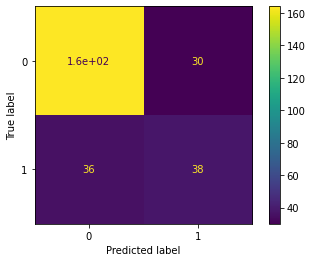

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       194
           1       0.56      0.51      0.54        74

    accuracy                           0.75       268
   macro avg       0.69      0.68      0.68       268
weighted avg       0.75      0.75      0.75       268



In [ ]:
# Scaling with parameter optimisation
from sklearn.model_selection import GridSearchCV

# Set values of the grid search
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
C_grid = {'C': C_values}
# Set the amount of folds for the cross-validation
n_folds = 5
# Do a model fit over a grid of C hyperparameters
logReg = LogisticRegression(penalty='l2', random_state=7)
grid_logReg = GridSearchCV(logReg, C_grid, cv=n_folds, refit=True)
grid_logReg.fit(X_train_scale,y_train)

# Predict based on the model
y_pred_scale=grid_logReg.predict(X_test_scale)

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred_scale)
print(matrix)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid_logReg, X_test_scale, y_test)  
plt.show()  

# Classification report
report = classification_report(y_test, y_pred_scale)
# cek hasil matrix
print(report)

In [ ]:
# Scaling with class imbalance and paramter optimisation

# menggunakan function SMOTE untuk melakukan kombinasi oversampling/undersampling
from imblearn.over_sampling import SMOTE
# function SMOTE dengan menerapkan proporsi 50%, maka ratio harus menjadi 1.0 Karena ratio mengacu pada proporsi gagal bayar
sm = SMOTE(random_state = 42, ratio = 1.0)
# Hasil dari function SMOTE disimpan dalam variabel X dan y
X_imbal,y_imbal = sm.fit_sample(df_encoded,target.ravel())

# Membagi data set menjadi train dan test, dimana proporsi test adalah 0.3 / 30% dari total data set
X_train_imbal, X_test_imbal, y_train_imbal, y_test_imbal = train_test_split(X_imbal, y_imbal, test_size =0.3, random_state=42)

# Scaling dan Hyperparameter
# Merubah nilai X dari Train dan Test menjadi standardisation
X_train_imbal_scale = sc.fit_transform(X_train_imbal)
X_test_imbal_scale = sc.fit_transform(X_test_imbal)

# Do a model fit over a grid of C hyperparameters
logReg = LogisticRegression(penalty='l2', random_state=7)
grid_logReg = GridSearchCV(logReg, C_grid, cv=n_folds, refit=True)
grid_logReg.fit(X_train_imbal_scale,y_train_imbal)

# Predict based on the model
y_pred_imbal_scale=grid_logReg.predict(X_test_imbal_scale)

# Confusion matrix
matrix = confusion_matrix(y_test_imbal, y_pred_imbal_scale)
print(matrix)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid_logReg, X_test_imbal_scale, y_test_imbal)  
plt.show()  

# Classification report
report = classification_report(y_test_imbal, y_pred_imbal_scale)
# cek hasil matrix
print(report)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


NameError: ignored

# 12. Scorecard Methodology

In [ ]:
# install scorecardpy
!pip install -q scorecardpy
#!pip install git+git://github.com/shichenxie/scorecardpy.git

In [ ]:
# Persiapan membuat dataset untuk Scorecard

# Get file from Google Sheet
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
worksheet = gc.open('OnClass_CreditScoring_data_v2').sheet1
# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
df = pd.DataFrame.from_records(rows)
new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header 

# replace empty string into null
df_scorecard = df.replace('', np.nan)
# scorecardpy library sudah memiliki fungsi untuk data split, scale, dan lainnya, oleh karena itu kita akan load df saja
df_scorecard['Lama_Cicilan'] = pd.to_numeric(df_scorecard['Lama_Cicilan'], errors='coerce').astype('Int64')
df_scorecard['Jumlah_Pinjaman'] = df_scorecard['Jumlah_Pinjaman'].str.replace(r',', '')
df_scorecard['Jumlah_Pinjaman'] = pd.to_numeric(df_scorecard['Jumlah_Pinjaman'], errors='coerce').astype('Int64')
df_scorecard['Usia'] = pd.to_numeric(df_scorecard['Usia'], errors='coerce').astype('Int64')

# drop all missing rows
df_scorecard = df_scorecard.dropna()

# Mengubah target variabel gagal_bayar menjadi angka 0 dan 1
conditions = [
             df_scorecard['gagal_bayar'] == '1_Gagal', 
             df_scorecard['gagal_bayar'] == '0_Bayar'
             ]
choices     = [
             1,
             0
             ]
df_scorecard['default'] = np.select(conditions,choices, default = 0)
df_scorecard['default'] = pd.to_numeric(df_scorecard['default'], errors='coerce').astype('int64')

# drop gagal_bayar dan ID
df_scorecard.drop(['gagal_bayar'], axis = 1, inplace = True)
df_scorecard.drop(['ID'], axis = 1, inplace = True)

df_scorecard.reset_index(drop=True,inplace=True)

In [ ]:
df_scorecard.info()
df_scorecard.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Status_Rekening_Bank            891 non-null    object
 1   Lama_Cicilan                    891 non-null    Int64 
 2   SLIK_Kredit                     891 non-null    object
 3   Tujuan_Pinjaman                 891 non-null    object
 4   Jumlah_Pinjaman                 891 non-null    Int64 
 5   Pendapatan_perbulan             891 non-null    object
 6   Lama_Bekerja                    891 non-null    object
 7   Status                          891 non-null    object
 8   Kepemilikan_Rumah               891 non-null    object
 9   Usia                            891 non-null    Int64 
 10  Lama_tinggal_ditempat_sekarang  891 non-null    object
 11  Pekerjaan                       891 non-null    object
 12  Jumlah_Pinjaman_di_Bank_ini     891 non-null    ob

,Status_Rekening_Bank,Lama_Cicilan,SLIK_Kredit,Tujuan_Pinjaman,Jumlah_Pinjaman,Pendapatan_perbulan,Lama_Bekerja,Status,Kepemilikan_Rumah,Usia,Lama_tinggal_ditempat_sekarang,Pekerjaan,Jumlah_Pinjaman_di_Bank_ini,rasio_cicilan_pendapatan,default
0,2_Tabungan_<=_100_ribu,6,2_Pinjaman_di_Bank_lain_Semua_Bagus,peralatan_rumahtangga,1169000,5. rahasia,5_>7_tahun_kerja,2_menikah,1_milik_sendiri,67,4_>10_tahun,1_pegawai,1_sudah_ada_1_pinjaman,4_lebih_30%,0
1,3_Tabungan_<=_2_juta,48,4_Pinjaman_di_Bank_lain_Ada_Telat,peralatan_rumahtangga,5951000,1. < 1 juta,3_1-4_tahun_kerja,1_belum_menikah,1_milik_sendiri,22,2_1-5_tahun,1_pegawai,0_ini_pinjaman_pertama,2_10_ke_20%,1
2,1_Tidak_ada_Rekening,12,2_Pinjaman_di_Bank_lain_Semua_Bagus,liburan,2096000,1. < 1 juta,4_4-7_tahun_kerja,2_menikah,1_milik_sendiri,49,3_5-10_tahun,2_wiraswasta,0_ini_pinjaman_pertama,2_10_ke_20%,0
3,2_Tabungan_<=_100_ribu,42,4_Pinjaman_di_Bank_lain_Ada_Telat,elektronik,7882000,1. < 1 juta,4_4-7_tahun_kerja,2_menikah,3_bersama_keluarga,45,4_>10_tahun,1_pegawai,0_ini_pinjaman_pertama,2_10_ke_20%,0
4,2_Tabungan_<=_100_ribu,24,3_Pinjaman_di_Bank_lain_Pernah_Telat,mobil_baru,4870000,1. < 1 juta,3_1-4_tahun_kerja,2_menikah,3_bersama_keluarga,53,4_>10_tahun,1_pegawai,1_sudah_ada_1_pinjaman,3_20_ke_30%,1


[INFO] creating woe binning ...


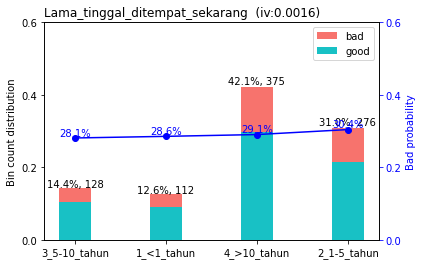

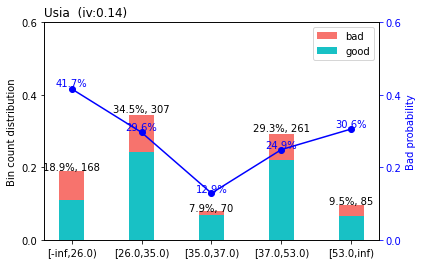

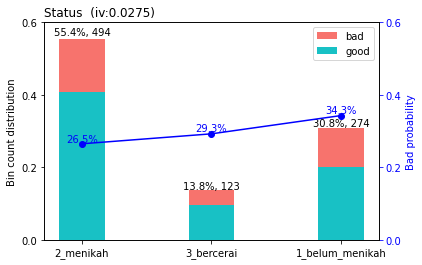

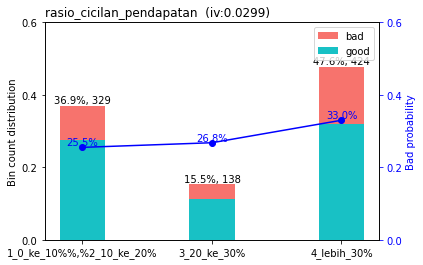

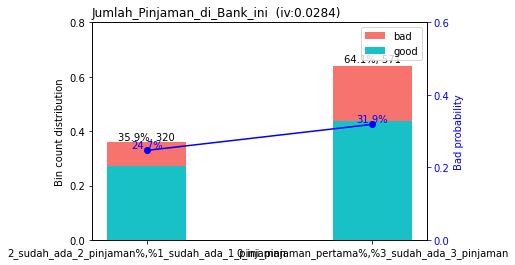

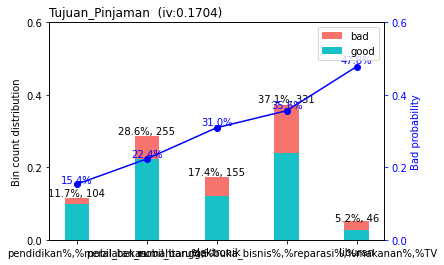

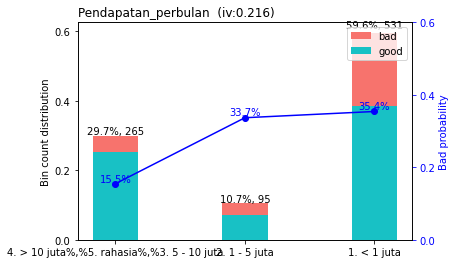

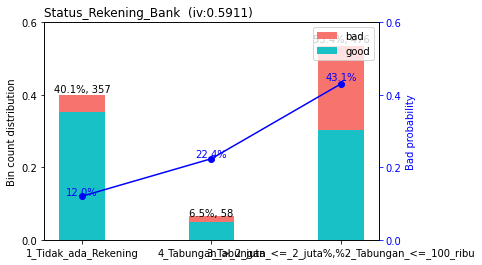

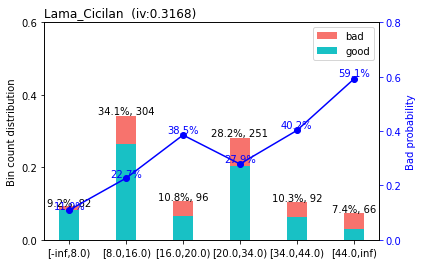

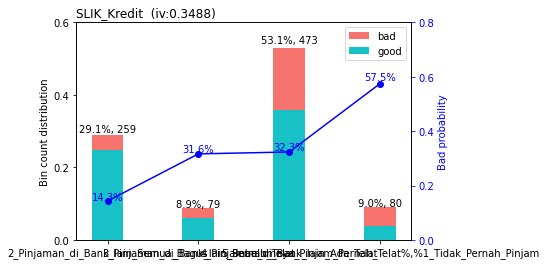

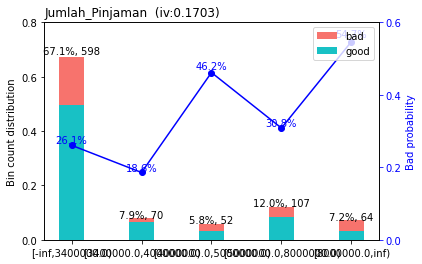

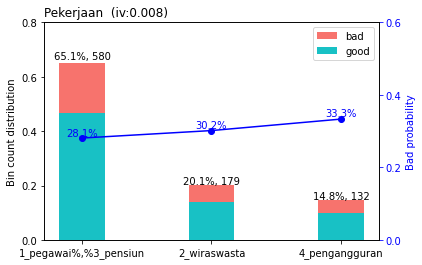

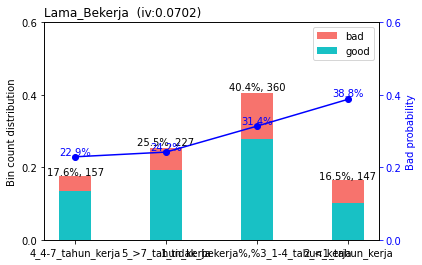

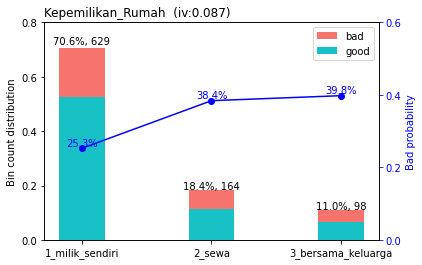

In [ ]:
# Credit Scoring using logistic regression with library scorecardpy
import scorecardpy as scpy

# Melakukan WOE binning
bins = scpy.woebin(df_scorecard, y = 'default')
scpy.woebin_plot(bins)

#dt_s = scpy.var_filter(df_scorecard, y = 'default')
# breaking dt_s menjadi training dan test dataset
train, test = scpy.split_df(df_scorecard, y='default').values()

In [ ]:
# Membuat model scorecard

# converting train and test into woe values
train_woe = scpy.woebin_ply(train, bins)
test_woe = scpy.woebin_ply(test, bins)

y_train = train_woe.loc[:,'default']
X_train = train_woe.loc[:,train_woe.columns != 'default']
y_test = test_woe.loc[:,'default']
X_test = test_woe.loc[:,train_woe.columns != 'default']

# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predicted probability
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

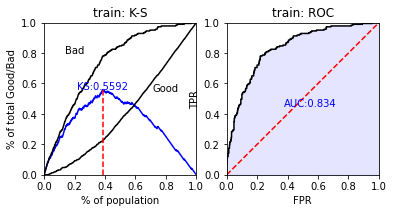

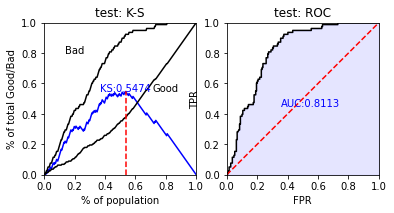

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


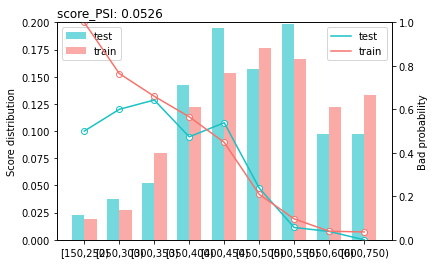

{'pic': {'score': <Figure size 432x288 with 2 Axes>},
 'psi':   variable       PSI
 0    score  0.052644}

In [ ]:
# performance ks & roc ------
train_perf = scpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scpy.perf_eva(y_test, test_pred, title = "test")

# score ------
card = scpy.scorecard(bins, lr, X_train.columns)
# credit score
train_score = scpy.scorecard_ply(train, card, print_step=0)
test_score = scpy.scorecard_ply(test, card, print_step=0)

# psi
scpy.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [ ]:
print(type(y_test))
print(type(test_pred))

test_pred[test_pred > 0.3] = 1
test_pred[test_pred <= 0.3] = 0
print(test_pred)

# Confusion matrix
matrix = confusion_matrix(test_pred, y_test)
print(matrix)

# Classification report
report = classification_report(y_test, test_pred)
# cek hasil matrix
print(report)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 1.]
[[134  15]
 [ 55  63]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.79     

In [ ]:
# using other dataset
# Import seaborn
import seaborn as sns

# Load an example dataset
titanic = sns.load_dataset("titanic")

# Drop column issue
titanic.drop(['adult_male'], axis = 1, inplace = True)
titanic.drop(['alone'], axis = 1, inplace = True)
titanic.drop(['class'], axis = 1, inplace = True)
titanic.drop(['deck'], axis = 1, inplace = True)

titanic.info()
titanic.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   who          891 non-null    object 
 9   embark_town  889 non-null    object 
 10  alive        891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,embark_town,alive
0,0,3,male,22.0,1,0,7.2500,S,man,Southampton,no
1,1,1,female,38.0,1,0,71.2833,C,woman,Cherbourg,yes
2,1,3,female,26.0,0,0,7.9250,S,woman,Southampton,yes
3,1,1,female,35.0,1,0,53.1000,S,woman,Southampton,yes
4,0,3,male,35.0,0,0,8.0500,S,man,Southampton,no


[INFO] creating woe binning ...


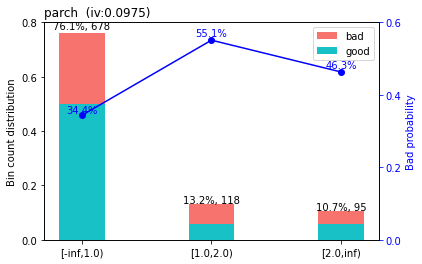

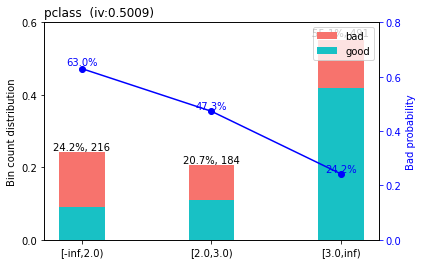

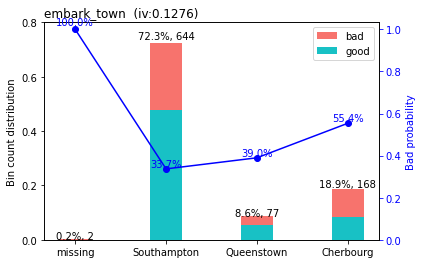

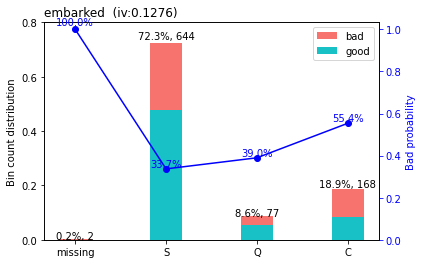

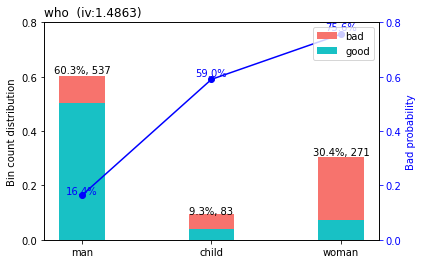

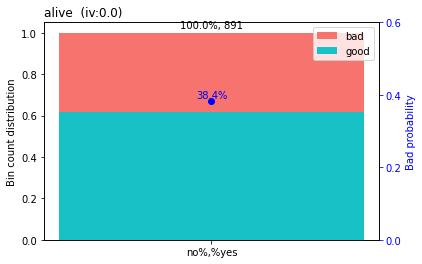

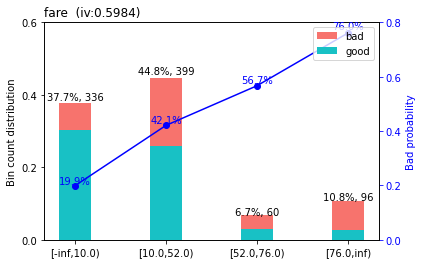

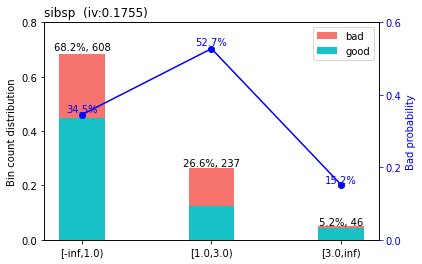

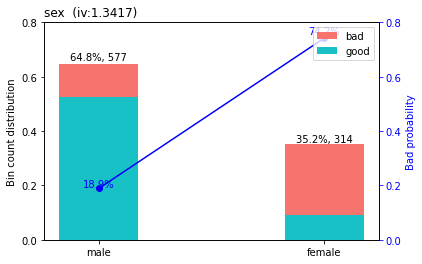

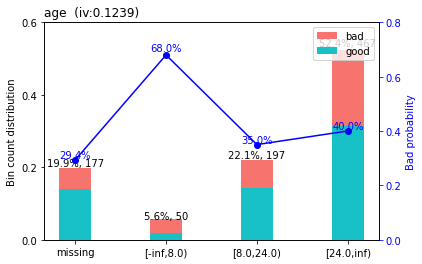

In [ ]:
# Credit Scoring using logistic regression with library scorecardpy
import scorecardpy as scpy

# Melakukan WOE binning
bins = scpy.woebin(titanic, y = 'survived')
scpy.woebin_plot(bins)

#dt_s = scpy.var_filter(df_scorecard, y = 'default')
# breaking dt_s menjadi training dan test dataset
train, test = scpy.split_df(titanic, y='survived').values()

[INFO] converting into woe values ...
[INFO] converting into woe values ...


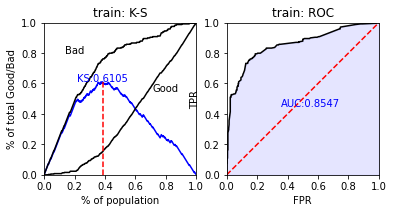

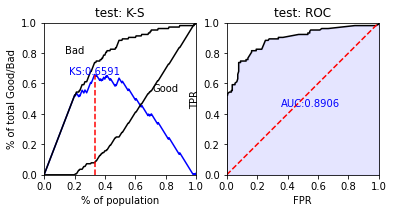

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


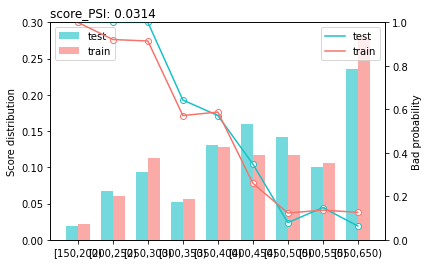

{'pic': {'score': <Figure size 432x288 with 2 Axes>},
 'psi':   variable       PSI
 0    score  0.031354}

In [ ]:
# Membuat model scorecard

# converting train and test into woe values
train_woe = scpy.woebin_ply(train, bins)
test_woe = scpy.woebin_ply(test, bins)

y_train = train_woe.loc[:,'survived']
X_train = train_woe.loc[:,train_woe.columns != 'survived']
y_test = test_woe.loc[:,'survived']
X_test = test_woe.loc[:,train_woe.columns != 'survived']

# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)

# predicted probability
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = scpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scpy.perf_eva(y_test, test_pred, title = "test")

# score ------
card = scpy.scorecard(bins, lr, X_train.columns)
# credit score
train_score = scpy.scorecard_ply(train, card, print_step=0)
test_score = scpy.scorecard_ply(test, card, print_step=0)

# psi
scpy.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [ ]:
print(type(y_test))
print(type(test_pred))

test_pred[test_pred > 0.4] = 1
test_pred[test_pred <= 0.4] = 0
print(test_pred)

# Confusion matrix
matrix = confusion_matrix(test_pred, y_test)
print(matrix)

# Classification report
report = classification_report(y_test, test_pred)
# cek hasil matrix
print(report)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 1. 0.]
[[136  19]
 [ 29  84]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85  